# GENERAL NEWS EDA

## OBJECTIVE

In [ ]:
The objective is to perform Exploratory Data Analysis and gather insights from the data, understand the correlation between
features and its impact.

EDA performed on the General News to find answers for the below questions

* Who are the top 10 contributors towards most positive and negative news that has been released last year?
* Can we find the contribution of news article towards a positive, negative or neutral impact?
* Does a correlation exist between Crypto currency price and sentiment score?
* Can popularity of a News be measured, which is a depiction of the impact it created in the market.

## Package Initialization and Data Loading

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates  as mdates
import matplotlib.colors as colors

# Loading the aggregated Data from JSON files

general_news_df = pd.read_json('raw_general_news.json')
crypto_df = pd.read_json('processed_crypto.json')
stocks_df = pd.read_json('processed_stocks.json')

### Top contributors towards the most Positive and Negative News over the past year

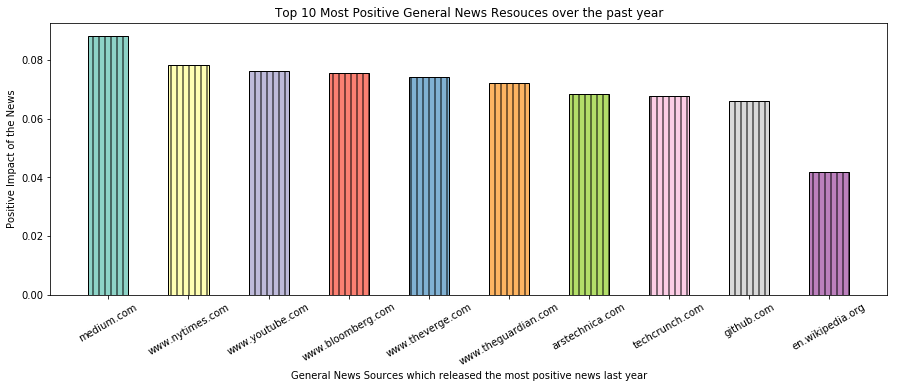

In [58]:
gen_news_group = general_news_df.groupby('url').size()
gen_news_group = gen_news_group.sort_values(axis=0, ascending=False).head(11)
gen_news_group = gen_news_group.to_frame()
url_list = gen_news_group.index[1:]
gen_news_filtered = general_news_df.loc[general_news_df['url'].isin(url_list)]

gen_news_count = gen_news_filtered.groupby('url').mean().reset_index()
gen_pos = gen_news_count.sort_values(['pos'], ascending = False)
gen_neg = gen_news_count.sort_values(['neg'], ascending = False)

plt.figure(figsize=(15,5))
plt.bar(gen_pos['url'], gen_pos['pos'], color=plt.cm.Set3(np.arange(len(gen_pos))),width =0.5, hatch = '||', edgecolor='black')
plt.xlabel("General News Sources which released the most positive news last year")
plt.xticks(rotation = 30)
plt.ylabel("Positive Impact of the News")
plt.title("Top 10 Most Positive General News Resouces over the past year")
plt.show()

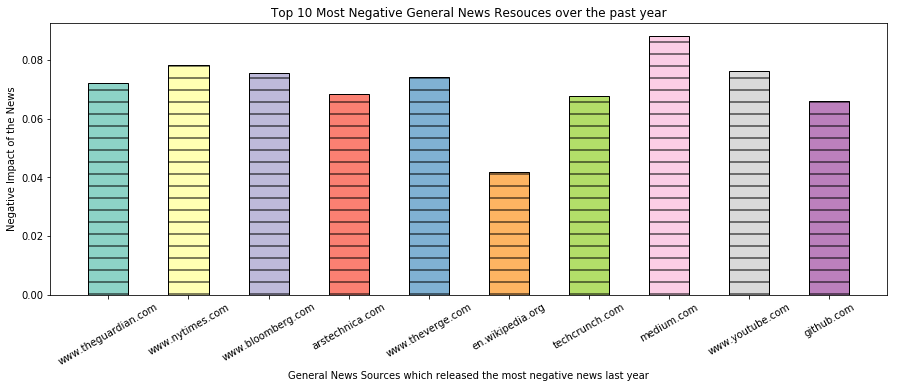

In [55]:
plt.figure(figsize=(15,5))
plt.bar(gen_neg['url'], gen_neg['pos'], color=plt.cm.Set3(np.arange(len(gen_neg))),width =0.5, hatch = '-', edgecolor='black')
plt.xlabel("General News Sources which released the most negative news last year")
plt.xticks(rotation = 30)
plt.ylabel("Negative Impact of the News")
plt.title("Top 10 Most Negative General News Resouces over the past year")
plt.show()

### News Data distribution

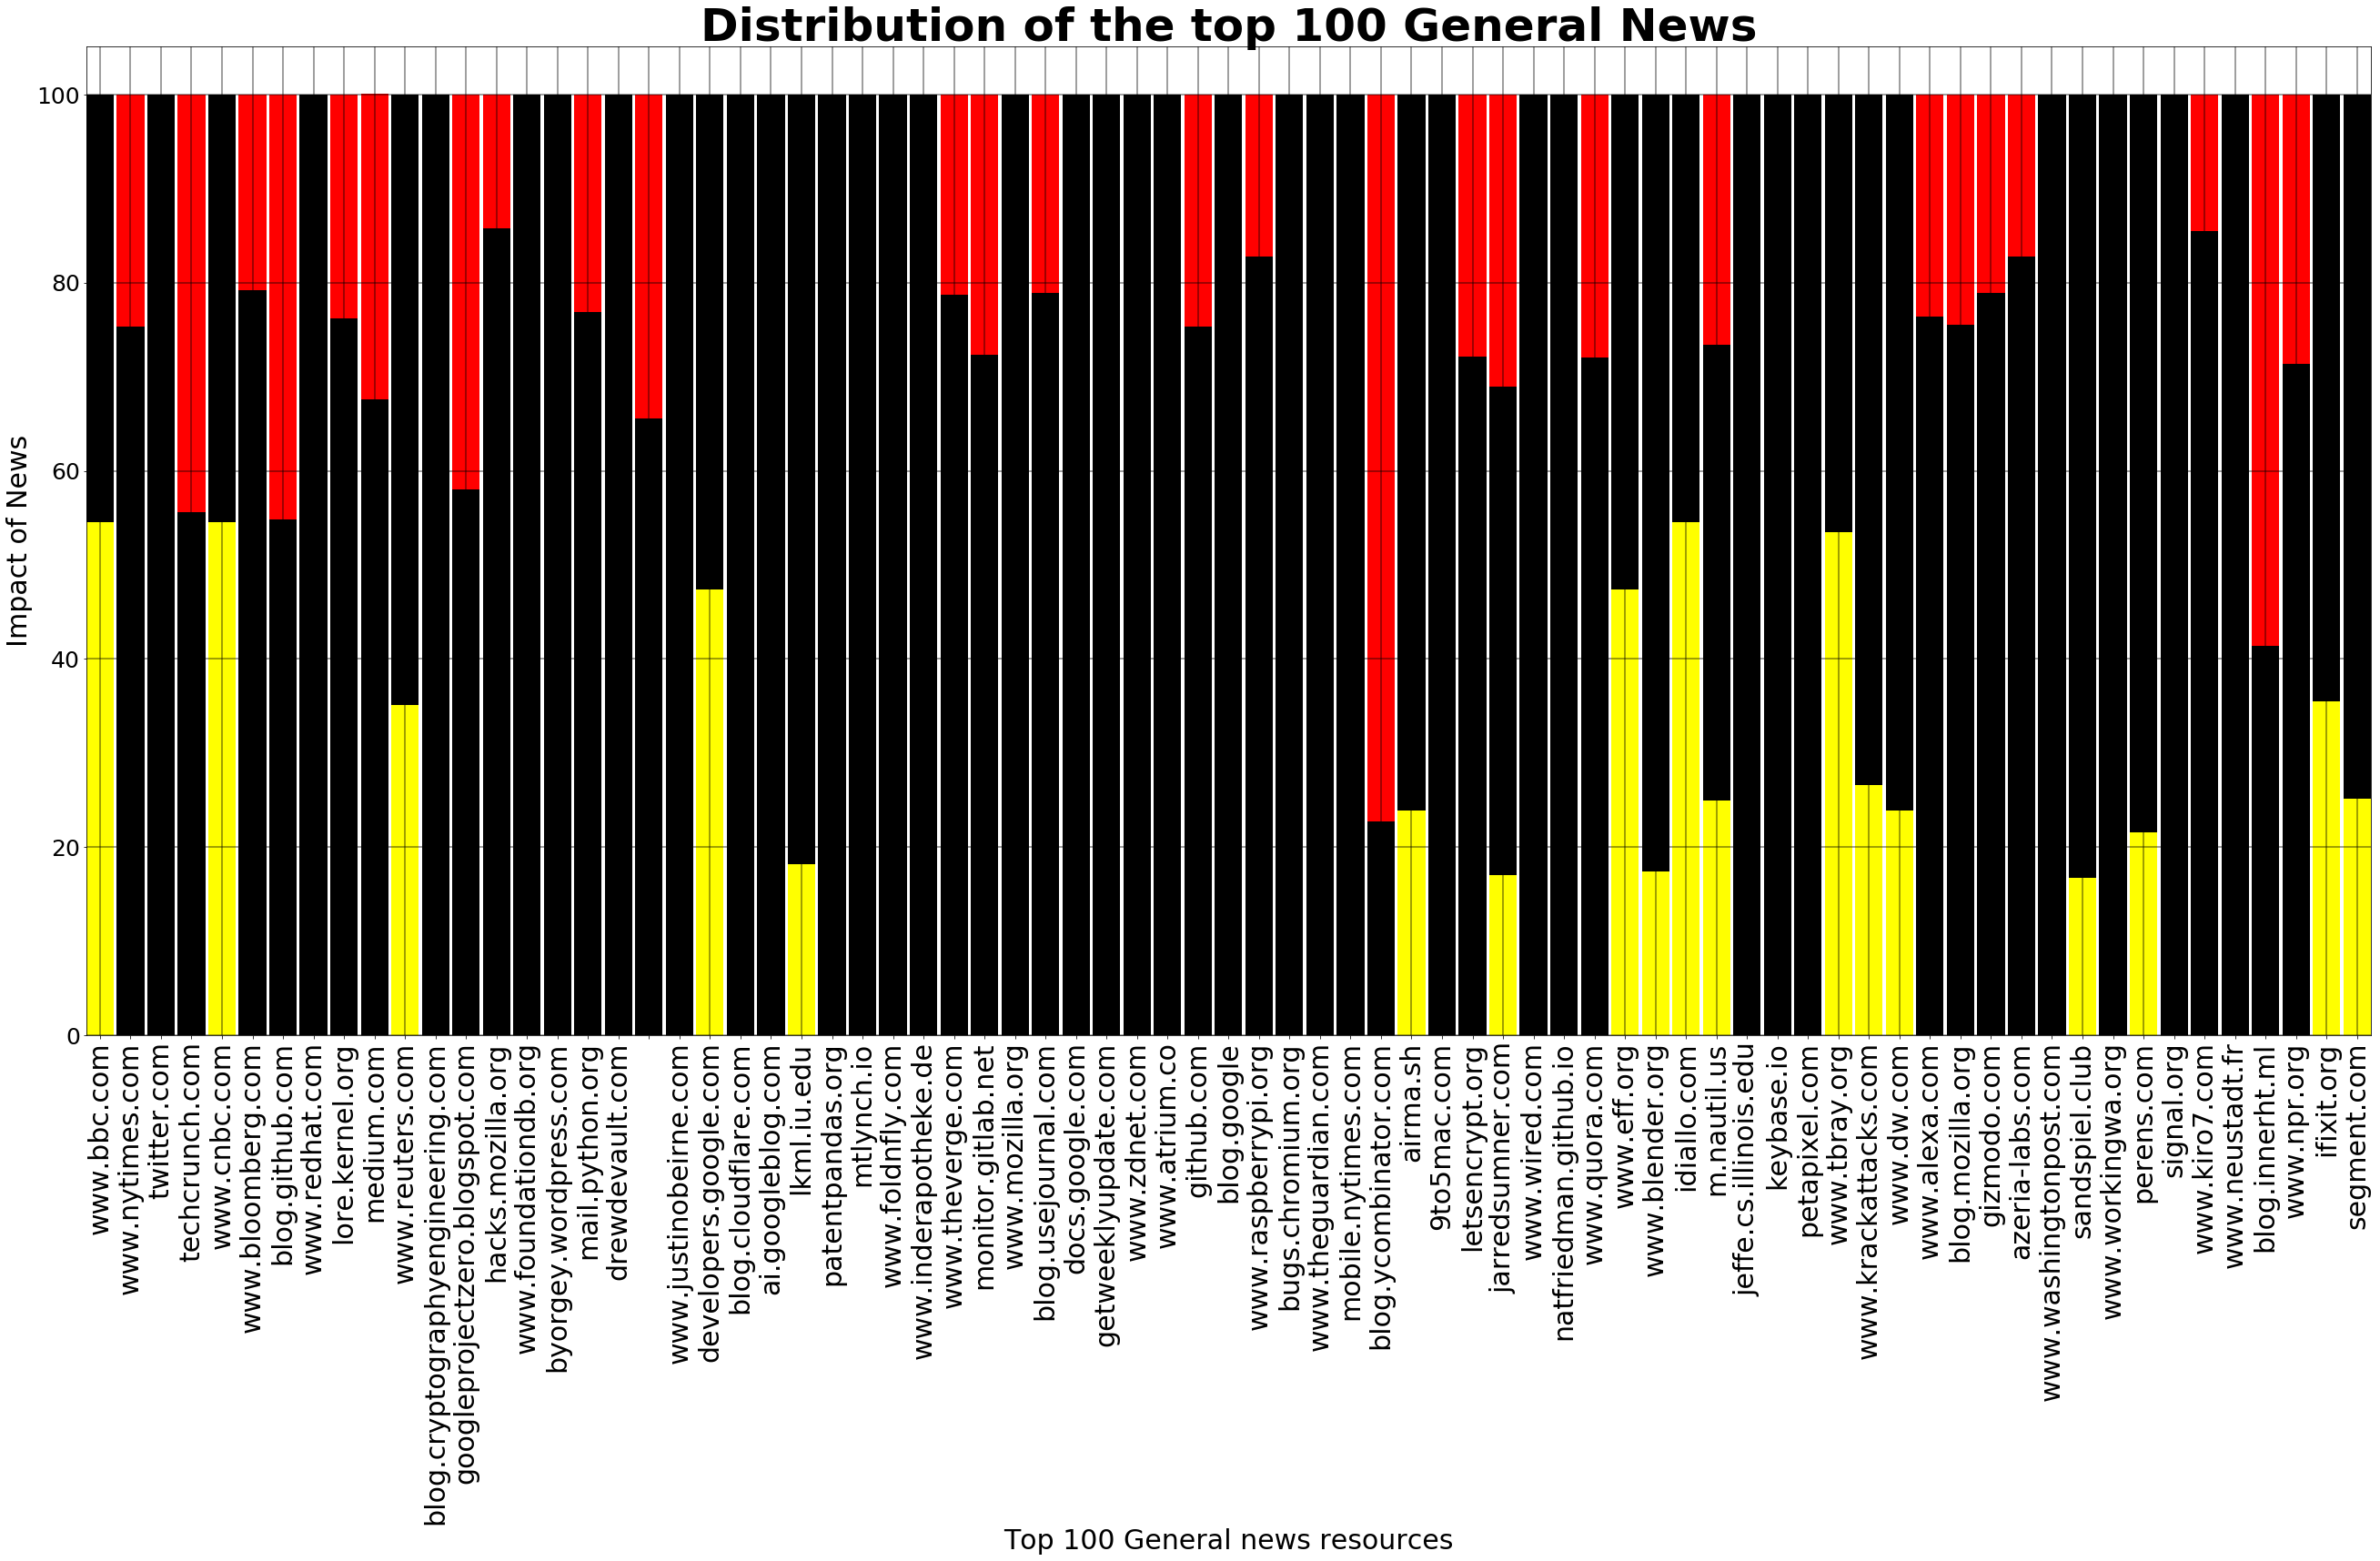

In [53]:
score = general_news_df.sort_values('score',ascending = False).head(100)
score['pos_percentage'] = score['pos']/1*100
score['neg_percentage'] = score['neg']/1*100
score['neu_percentage'] = score['neu']/1*100
width = 0.9
plt.figure(figsize=(45,20))
plt.margins(x=0)
p1 = plt.bar(score.url, score.neg_percentage, width, color='#FFFF00')
p2 = plt.bar(score.url, score.neu_percentage, width, bottom=score.neg_percentage, color='#000000')
p3 = plt.bar(score.url, score.pos_percentage, width, bottom=score.neu_percentage+score.neg_percentage, color='#FF0000')
plt.grid(color='k', linestyle='-', linewidth=1.5, alpha=0.5)
plt.xlabel('Top 100 General news resources', size=30)
plt.ylabel('Impact of News',size=30)
plt.title('Distribution of the top 100 General News', size=50, weight='bold')
plt.xticks(rotation = 90, size =30)
plt.yticks(size =25)
plt.show()

#### INFERENCE

* From the above graph it is evident that the news over the last year majorly had neutral reviews, which inturn had a neutral 
impact on the Market.
* It is also seen that a good amount of news has gained positive reviews and there was considerably very less negative news last
year.

### Word Cloud Generated for Crypto Currency and Stocks News Data

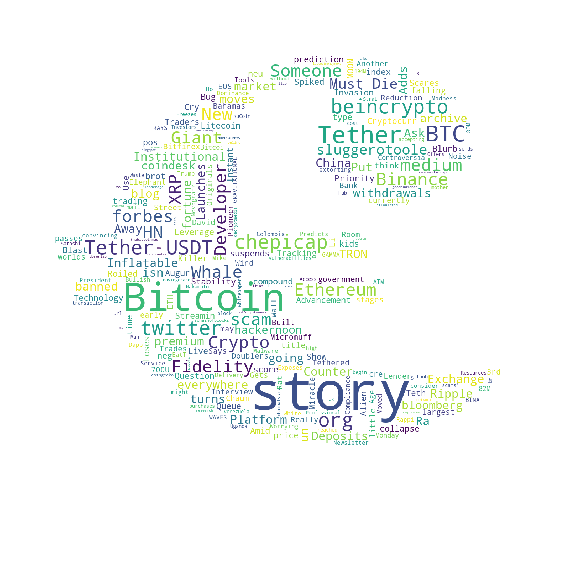

In [56]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 
    
crypto_info = ['Bitcoin','Ethereum','XRP','EOS', 'Litecoin', 'BTC', 'Tether', 'Stellar', 'TRON', 'Binance']
crypto = str(general_news_df[general_news_df['title'].str.contains('|'.join(crypto_info))])
crypto_mask = np.array(Image.open('crypto.jpg'))
plot_wordcloud(crypto, crypto_mask, max_words=8000, max_font_size=350, figure_size=(10,8))

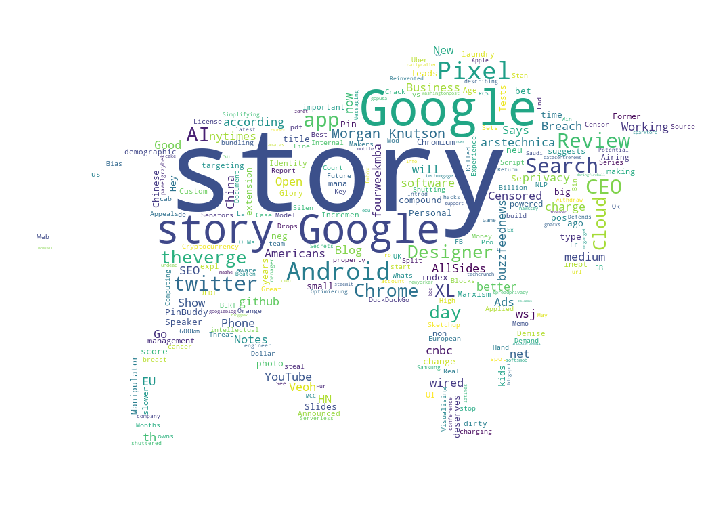

In [57]:
stock_info = ['Googl', 'MSFT', 'home depot', 'Wmt', 'WFC', 'citigroup', 'AAPL', 'cocacola', 'XOM', 'CVX', 'exxon', 'chevron']
stocks = str(general_news_df[general_news_df['title'].str.contains('|'.join(stock_info))])
stock_mask = np.array(Image.open('S2.jpg'))
plot_wordcloud(stocks, stock_mask, max_words=10000, max_font_size=310, figure_size=(10,8))

### Correlation between an Asset and it's Sentiment Score

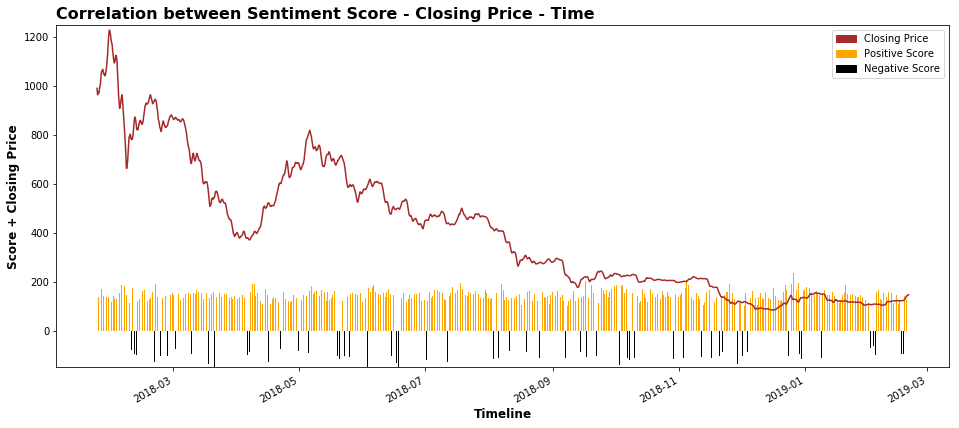

In [17]:
crypto_df['created_utc'] = pd.to_datetime(crypto_df['created_utc']).dt.tz_localize(None)
plot_1 = crypto_df[['asset_name','created_utc','news_compound','news_pos', 'news_neg','close']].sort_values('created_utc')
plot_1 = plot_1[plot_1.asset_name == 'Ethereum']
dF = plot_1.set_index('created_utc')
dF1 = dF[dF['news_compound']>=0]
dF2 = dF[dF['news_compound']<0]
fig,axes = plt.subplots(figsize=(16,7))
axes.xaxis_date()
axes.plot(mdates.date2num(list(dF.index)),pd.Series.rolling(dF.close,24).mean(),color='brown')
axes.bar(mdates.date2num(list(dF1.index)),pd.Series.rolling(dF1.news_compound*2000,24).mean(),align='center',width=0.02,color='orange')
axes.bar(mdates.date2num(list(dF2.index)),pd.Series.rolling(dF2.news_compound*3000,24).mean(),align='center',width=0.02,color='black')
axes.set_title('Correlation between Sentiment Score - Closing Price - Time', fontweight="bold",loc='left',fontsize=16)
axes.set_xlabel('Timeline',fontweight="bold",fontsize=12)
axes.set_ylabel('Score + Closing Price',fontweight="bold",fontsize=12)

black_patch = mpatches.Patch(color='black', label='Negative Score')
orange_patch = mpatches.Patch(color='orange', label='Positive Score')
brown_patch = mpatches.Patch(color='brown', label='Closing Price')

plt.legend(handles=[brown_patch,orange_patch,black_patch])
axes.set_ylim(-150,1250)
fig.autofmt_xdate()

#### INFERENCE

From the above graph it is evident that News data has had an impact on the market and a relationship exist between the sentiment
score and closing price of the asset.

### Most Popular News Resources

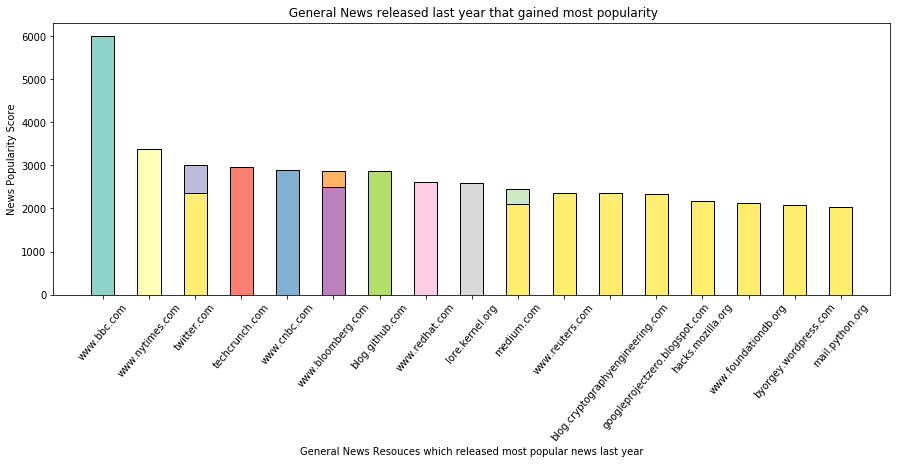

In [52]:
score = general_news_df.sort_values('score',ascending = False).head(20)
plt.figure(figsize=(15,5))
plt.bar(score['url'], score['score'], color=plt.cm.Set3(np.arange(len(score))),width =0.5, edgecolor='black')
plt.xlabel("General News Resouces which released most popular news last year")
plt.xticks(rotation = 50)
plt.ylabel("News Popularity Score")
plt.title(" General News released last year that gained most popularity")
plt.show()

#### INFERENCE

It is evident from the above graph that there were very few news that gained popularity among the people and this inturn has an effect on Market fluctuations.